In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import matplotlib.pyplot as plt

In [10]:
vocab_size = 10000 # Serves as a word frequency list for a certain amount of values- in the case, 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post' # This is used to ensure that all words are of equal tokenized length by appending zero to the back since post method is used
oov_tok = "<OOV>" # Serves as a filler adding the value, one to make up for words not tokenized
training_size = 20000 # This is the amount of data which has be divided, required to be used to train the model

In [11]:
# Deserialize the JSON file
with open('sarcasm.json', 'r') as f:
    datastore = json.load(f)

    sentences = []
    labels = []

    for item in datastore:
        sentences.append(item['headline'])
        labels.append(item['is_sarcastic'])

In [12]:
# Divide the data into two sets - one for training and the other for testing
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [13]:
# Initialize an object from the Tokenizer class which would be used to tokenize each word
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [15]:
# This piece of code is added to get everything to work in TensorFlow 2.x
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_max_pooling1d (Glob  (None, 16)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.5106 - accuracy: 0.7476 - val_loss: 0.3883 - val_accuracy: 0.8304 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 2s - loss: 0.2748 - accuracy: 0.8904 - val_loss: 0.3596 - val_accuracy: 0.8436 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.1602 - accuracy: 0.9417 - val_loss: 0.3918 - val_accuracy: 0.8423 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.0919 - accuracy: 0.9696 - val_loss: 0.4576 - val_accuracy: 0.8396 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.0497 - accuracy: 0.9858 - val_loss: 0.5189 - val_accuracy: 0.8372 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.0244 - accuracy: 0.9943 - val_loss: 0.5946 - val_accuracy: 0.8350 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.0118 - accuracy: 0.9982 - val_loss: 0.6600 - val_accuracy: 0.8371 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.0060 - accuracy: 0.9992 - val_loss: 0.7211 - val_accuracy: 0.8346 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

C:\Users\Asus\AppData\Local\Temp\ipykernel_12880\4048343914.py:6: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  plt.legend(string, 'val_'+string)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12880\4048343914.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12880\4048343914.py:6: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12880\4048343914.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://mat

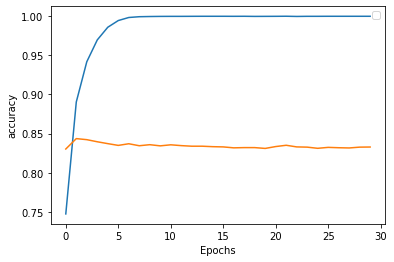

C:\Users\Asus\AppData\Local\Temp\ipykernel_12880\4048343914.py:6: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  plt.legend(string, 'val_'+string)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12880\4048343914.py:6: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12880\4048343914.py:6: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12880\4048343914.py:6: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: https://mat

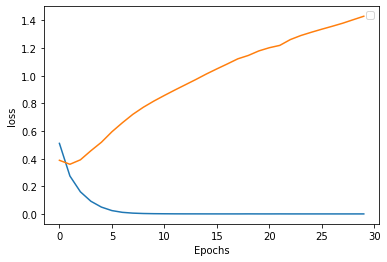

In [20]:
# A graph showing the metrics of the model created
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend(string, 'val_'+string)
    plt.show()
    
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [25]:
# To test the model, I will be making use of custom inputs for evaluation
sentence = [
    'granny starting to fear spiders in the garden might be real',
    'the weather is bright and sunny',
    'i now pluck money from trees'
]

sequences = tokenizer.texts_to_sequences(sentence)
padded_sentence = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

print(model.predict(padded_sentence))

1/1 [==============================] - 0s 21ms/step
[[9.9948949e-01]
 [8.2700340e-11]
 [4.9675957e-05]]
